# 3. IMDB_Classification_EDA<a id='2_Data_wrangling'></a>

## 3.1 Table of Contents<a id='2.1_Contents'></a>
* 3. Bank_Churnrate_EDA
  * 3.1 Table of Contents
  * 3.2 Introduction
  * 3.3 Imports
  * 3.4 Load movie_df_clean Data & Audit
  * 3.5 Explore The Data
    * 3.5.1 Filtering features of interest
    * 3.5.2 Visualization for Class Balance
  * 3.6 Save Data
  * 3.7 Summary


## 3.2 Introduction

Further Analysis will be conducted with the movie_df_clean dataset to further assess the dataset and glean any further insights regarding the dataset's feature balance for genres.

## 3.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to perform further EDA for the previously "cleaned" movie dataset.

In [115]:
#Import pandas, matplotlib.pyplot, seaborn, and numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3.4 Load movie_df_clean Data & Audit

In [116]:
#Dropped first column since it was unnamed 
#Code to remove the first column for the dataset: https://www.statology.org/drop-unnamed-column-pandas/
movie_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/IMDB_Classification/0_Datasets/movie_df_clean.csv', index_col=0)

Auditing the dataset with .info() and .head() displaying the first few records.

In [117]:
#info method on movie_df_clean to see a summary of the data
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972 entries, 0 to 3971
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             3972 non-null   int64  
 1   id                3972 non-null   object 
 2   image             3972 non-null   object 
 3   title             3972 non-null   object 
 4   description       3971 non-null   float64
 5   runtimeStr        3937 non-null   object 
 6   genres            3939 non-null   object 
 7   genreList         3972 non-null   object 
 8   contentRating     3971 non-null   object 
 9   imDbRating        3972 non-null   float64
 10  imDbRatingVotes   3972 non-null   int64  
 11  metacriticRating  1470 non-null   float64
 12  plot              3941 non-null   object 
 13  stars             0 non-null      float64
 14  starList          3972 non-null   object 
 15  Genre_1           3939 non-null   object 
 16  Genre_2           2919 non-null   object 


Looking at the above results, it appears that indeed there are movies listed that have no genres classified with them. These movies will be filtered out of the dataset as the image classifier needs predefined labels in terms for training of label categorization. 

In [118]:
#Replacing all values with NaN as 'None' for ease of filtering. Code to replace values found on https://stackoverflow.com/questions/66760733/change-nan-to-none-in-pandas-dataframe
#Locating all movies with 'None' for their Genre.
movie_df = movie_df.replace({np.nan:'None'})
movie_df[movie_df['genres'] == 'None']

,index,id,image,title,description,runtimeStr,genres,genreList,contentRating,imDbRating,imDbRatingVotes,metacriticRating,plot,stars,starList,Genre_1,Genre_2,Genre_3
476,484,tt0310978,https://m.media-amazon.com/images/M/MV5BMWUwMW...,Dark Passage to Wan,1995.0,60 mins,None,[],G,0.0,0,None,None,None,[],None,None,None
477,485,tt0114409,https://m.media-amazon.com/images/M/MV5BMGQzYm...,Shakuhachi,1995.0,60 mins,None,[],G,0.0,0,None,Shakuhachi - the Japanese flute has a very rel...,None,[],None,None,None
737,749,tt0384129,https://m.media-amazon.com/images/M/MV5BMTc1MD...,Girl Cottage,1998.0,98 mins,None,[],PG,0.0,0,None,None,None,[],None,None,None
1074,1098,tt0335591,https://m.media-amazon.com/images/M/MV5BNjIyNj...,Mary and Joe,2002.0,102 mins,None,[],PG,4.6,38,None,What if Jesus were born in the year 2002 to a ...,None,[],None,None,None
1081,1108,tt6447558,https://m.media-amazon.com/images/M/MV5BYWNjOG...,Les Etoiles filantes,2002.0,None,None,[],G,0.0,0,None,None,None,[],None,None,None
1493,1532,tt1437381,https://m.media-amazon.com/images/M/MV5BNDQ4Nz...,A Sacred Proof,2006.0,60 mins,None,[],PG,0.0,0,None,"Challenged by Harvard Magazine to prove ""intel...",None,[],None,None,None
1496,1537,tt2981534,https://m.media-amazon.com/images/M/MV5BMGRkOD...,Roger Hodgson: Take the Long Way Home - Live i...,2006.0,59 mins,None,[],G,9.1,11,None,None,None,[],None,None,None
1768,1816,tt2882888,https://m.media-amazon.com/images/M/MV5BMTQ1OT...,Hawaii Underwater Paradise,2008.0,62 mins,None,[],G,0.0,0,None,"In this documentary, we go underwater to explo...",None,[],None,None,None
1775,1823,tt1378803,https://m.media-amazon.com/images/M/MV5BYmY3Ym...,Touch,2008.0,None,None,[],G,0.0,0,None,An old man has an enchanting encounter with a ...,None,[],None,None,None
1781,1830,tt2233194,https://m.media-amazon.com/images/M/MV5BNDAxNz...,On Wheels Brasil,2008.0,53 mins,None,[],PG,0.0,0,None,"Following the lives of people that push, pull,...",None,[],None,None,None


In [119]:
#Filtering out movies with 'None' values for their genre
movie_df = movie_df[movie_df['genres'] != 'None']

In [120]:
movie_df.shape

(3939, 18)

## 3.5 Explore The Data

### 3.5.1 Filtering features of interest

Filter movie_df_clean to just include features such as id, image, title, and genres.

In [129]:
movie_df_filter = movie_df[['id', 'image', 'title', 'Genre_1', 'Genre_2', 'Genre_3']]
movie_df_filter.head()

,id,image,title,Genre_1,Genre_2,Genre_3
0,tt0099785,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Home Alone,Comedy,Family,None
1,tt0100944,https://m.media-amazon.com/images/M/MV5BMjI1MD...,The Witches,Adventure,Comedy,Family
2,tt0099810,https://m.media-amazon.com/images/M/MV5BZDdkOD...,The Hunt for Red October,Action,Adventure,Thriller
3,tt0099088,https://m.media-amazon.com/images/M/MV5BYjhlMG...,Back to the Future Part III,Adventure,Comedy,Sci-Fi
4,tt0100419,https://m.media-amazon.com/images/M/MV5BYzk3NG...,Problem Child,Comedy,Family,None


In [130]:
movie_df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3971
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3939 non-null   object
 1   image    3939 non-null   object
 2   title    3939 non-null   object
 3   Genre_1  3939 non-null   object
 4   Genre_2  3939 non-null   object
 5   Genre_3  3939 non-null   object
dtypes: object(6)
memory usage: 215.4+ KB


In [131]:
#Reverting 'None' value to NaN in order to identify feature balance for movie genres
movie_df_filter = movie_df_filter.replace({'None':np.nan})

In [132]:
movie_df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3971
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3939 non-null   object
 1   image    3939 non-null   object
 2   title    3939 non-null   object
 3   Genre_1  3939 non-null   object
 4   Genre_2  2919 non-null   object
 5   Genre_3  1989 non-null   object
dtypes: object(6)
memory usage: 215.4+ KB


Since the future image classifier will have multi-class label output, each genre column will need to be checked for class balance. What seems clear however are that few movies only have 2 genres or 1 genre listed where movies with only 2 genres are 2919/3939 or about 74% of the total movies and 1989/3939 or about 50% have only 1 genre listed.

In [133]:
#Reverting NaN genre for movies back to 'None' for vizulation of 'None' category for movie genre
movie_df_filter = movie_df_filter.replace({np.nan:'None'})
movie_df_filter.head()

,id,image,title,Genre_1,Genre_2,Genre_3
0,tt0099785,https://m.media-amazon.com/images/M/MV5BMzFkM2...,Home Alone,Comedy,Family,None
1,tt0100944,https://m.media-amazon.com/images/M/MV5BMjI1MD...,The Witches,Adventure,Comedy,Family
2,tt0099810,https://m.media-amazon.com/images/M/MV5BZDdkOD...,The Hunt for Red October,Action,Adventure,Thriller
3,tt0099088,https://m.media-amazon.com/images/M/MV5BYjhlMG...,Back to the Future Part III,Adventure,Comedy,Sci-Fi
4,tt0100419,https://m.media-amazon.com/images/M/MV5BYzk3NG...,Problem Child,Comedy,Family,None


### 3.5.2 Visualization for Class Balance

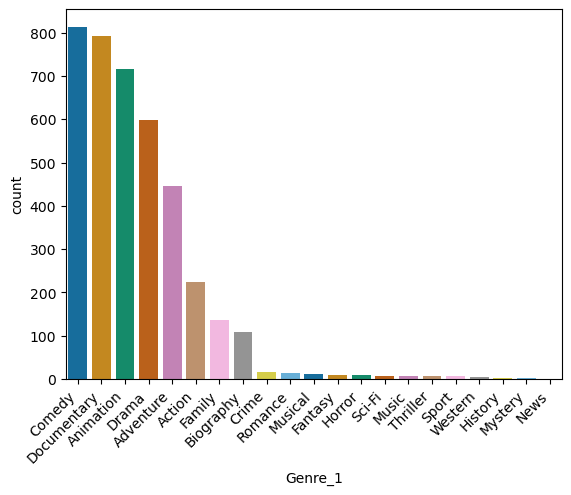

In [134]:
#Code to order genres based on descending value count found on https://stackoverflow.com/questions/46623583/order-categories-by-count-in-a-countplot
sns.countplot(data = movie_df_filter, x='Genre_1', order=movie_df_filter['Genre_1'].value_counts().index, palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.show()

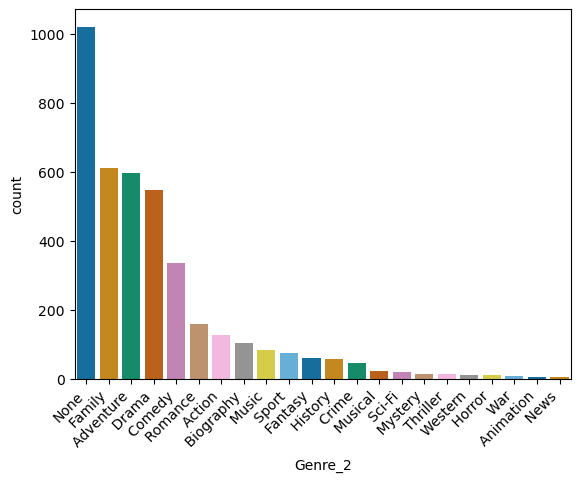

In [135]:
sns.countplot(data = movie_df_filter, x='Genre_2', order=movie_df_filter['Genre_2'].value_counts().index, palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.show()

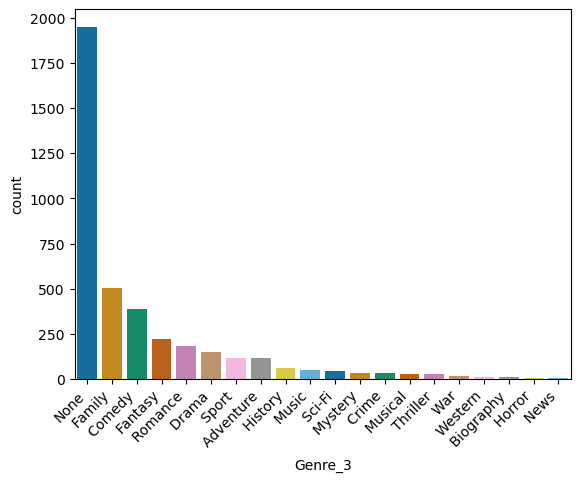

In [136]:
sns.countplot(data = movie_df_filter, x='Genre_3', order=movie_df_filter['Genre_3'].value_counts().index, palette='colorblind')
plt.xticks(rotation=45, ha='right')
plt.show()

Looking at the above plots, there is a clear class imbalance based on the types of genres for movies being represented within the dataset. The top 5 movie classes based on represenation are Comedy, Docomentaries, Animation, Drama, and Adventure. The top second class of genre label are None, Family, Adventure, Drama, and Comedy. The top 5 third class labels are None, Family, Comedy, Fantasy, and Romance. What also seems to be the case for the dataset is that if the Genre_2 has a 'None' within its value, Genre_3 also has a 'None' in its value which can be seen as intercollinearity between the values in the dataset.

## 3.6 Save data

In [112]:
#Dropped 'NA' values dataset shape
movie_df_filter.shape

(3939, 6)

In [113]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/IMDB_Classification/0_Datasets'
movie_df_filter.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/IMDB_Classification/0_Datasets/movie_df_filtered.csv') 

## 3.7 Summary

After a further analysis and "cleaning" of the dataset from dropping any movies with no genre label as well as filtering the dataset for key features of importance for the future image classifer, there is a definite class imbalance for the dataset. This makes sense however because of largely focusing on movies within the G or PG category which does limit how many movies would be represented for each of the classes. Based on the EDA, the top 5 genres for the first category are Comedy, Docomentaries, Animation, Drama, and Adventure. The second category are None, Family, Adventure, Drama, and Comedy. And for the third class label are None, Family, Comedy, Fantasy, and Romance. As mentioned it does seem that there is intercollineralty between the classes as if a movie has 'None' within its Genre_2 it also has a 'None' within Genre_3 as the genre labels are sequential. 

This class imbalance will be kept in mind when developing the image classification model and prior to implementing, the categorical values will be one-hot encoded prior to creating a respective training and test set.